# Diabetes Analysis of Pima Indians Dataset

**Objective:** Analyze the dataset to identify key factors contributing to diabetes, understand feature distributions, and provide insights for healthcare or risk assessment.

In [65]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


# Read in the data

df = pd.read_csv(r"C:\Users\ASUS\Downloads\diabetes.csv")

In [66]:
# let's look at the data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [67]:
df.shape

(768, 9)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
# check for null values
pd.isnull(df).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 ***There is no nan values.***

In [114]:
# Drop any duplicates

df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,AgeGroup,Pregnancy_Group
0,6,148,72,35,0,33.6,0.627,50,1,obese,Late Middle Age,6+
1,1,85,66,29,0,26.6,0.351,31,0,overweight,Early Middle Age,1–2
2,8,183,64,0,0,23.3,0.672,32,1,normal,Early Middle Age,6+
3,1,89,66,23,94,28.1,0.167,21,0,overweight,Young Adult,1–2
4,0,137,40,35,168,43.1,2.288,33,1,obese,Early Middle Age,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,obese,Senior,6+
764,2,122,70,27,0,36.8,0.340,27,0,obese,Young Adult,1–2
765,5,121,72,23,112,26.2,0.245,30,0,overweight,Early Middle Age,3–5
766,1,126,60,0,0,30.1,0.349,47,1,obese,Late Middle Age,1–2


In [71]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Adds a few derived featured columns

In [73]:
def add_features(data_frame):
    
    # BMI category
    data_frame["BMI_Category"] = "obese"

    data_frame.loc[(data_frame["BMI"] >= 0) & (data_frame["BMI"] < 18.5), "BMI_Category"] = "underweight"
    data_frame.loc[(data_frame["BMI"] >= 18.5) & (data_frame["BMI"] <= 24.9), "BMI_Category"] = "normal"
    data_frame.loc[(data_frame["BMI"] >= 25) & (data_frame["BMI"] <= 29.9), "BMI_Category"] = "overweight"

    # Age groups (decades)
    bins = [0, 17, 29, 44, 59, 74, 120]
    labels = [
        "Teen", 
        "Young Adult", 
        "Early Middle Age", 
        "Late Middle Age", 
        "Senior", 
        "Elderly"
    ]
    
    data_frame["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

    # Pregnancy groups
    data_frame["Pregnancy_Group"] = "6+"

    data_frame.loc[df["Pregnancies"] == 0, "Pregnancy_Group"] = "0"
    data_frame.loc[(df["Pregnancies"] >= 1) & (data_frame["Pregnancies"] <= 2), "Pregnancy_Group"] = "1–2"
    data_frame.loc[(df["Pregnancies"] >= 3) & (data_frame["Pregnancies"] <= 5), "Pregnancy_Group"] = "3–5"
    return data_frame

In [74]:
df = add_features(df)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,AgeGroup,Pregnancy_Group
0,6,148,72,35,0,33.6,0.627,50,1,obese,Late Middle Age,6+
1,1,85,66,29,0,26.6,0.351,31,0,overweight,Early Middle Age,1–2
2,8,183,64,0,0,23.3,0.672,32,1,normal,Early Middle Age,6+
3,1,89,66,23,94,28.1,0.167,21,0,overweight,Young Adult,1–2
4,0,137,40,35,168,43.1,2.288,33,1,obese,Early Middle Age,0


#  Exploratory Data Analysis 

## Outcome Distribution

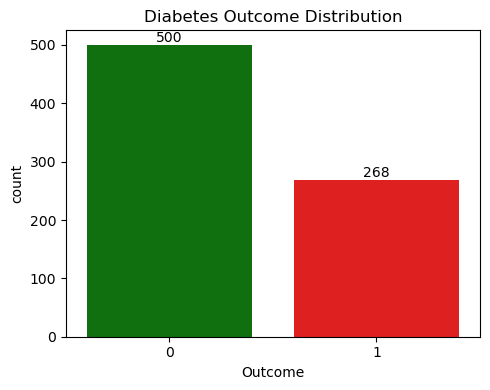

In [152]:

plt.figure(figsize=(5,4))

# define custom palette
palette = {0: 'green', 1: 'red'}  

# create countplot with custom colors
ax = sns.countplot(x="Outcome", data=df, hue= "Outcome", palette=palette, legend=False)

# add bar labels
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title("Diabetes Outcome Distribution")
plt.tight_layout()
plt.show()
plt.close()

## Feature Distributions and Insights

### Glucose and Diabetes Risk

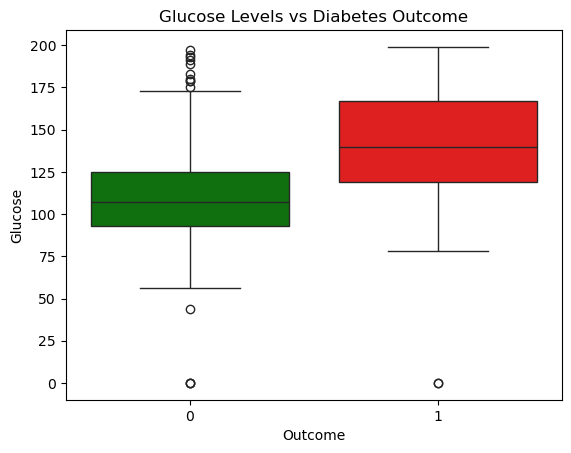

In [157]:
# define custom palette
palette = {0: 'green', 1: 'red'}

sns.boxplot(x='Outcome', y='Glucose', data=df, hue= "Outcome", palette=palette, legend=False)
plt.title('Glucose Levels vs Diabetes Outcome')
plt.show()

- ***Higher glucose levels are strongly associated with diabetes. Most individuals with diabetes have glucose >120 mg/dL.***

### BMI and Diabetes

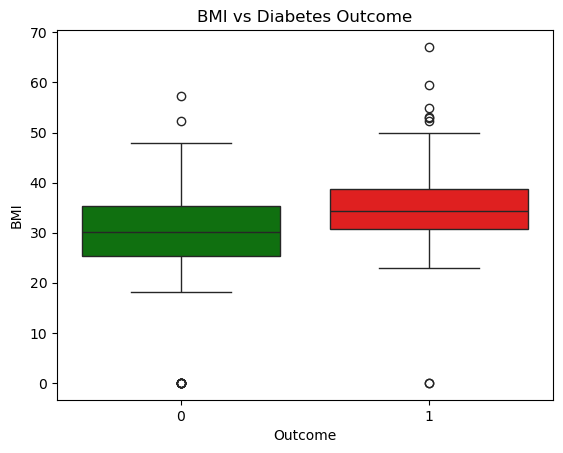

In [154]:
# define custom palette
palette = {0: 'green', 1: 'red'}  

sns.boxplot(x='Outcome', y='BMI', data=df, hue= "Outcome", palette=palette, legend=False)
plt.title('BMI vs Diabetes Outcome')
plt.show()

- ***Individuals with diabetes generally have higher BMI values***

## Age and Diabetes

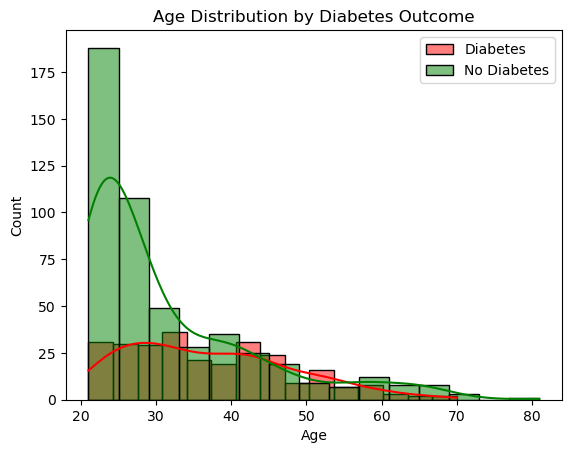

In [120]:
sns.histplot(df[df['Outcome']==1]['Age'], bins=15, kde=True, color='red', label='Diabetes')
sns.histplot(df[df['Outcome']==0]['Age'], bins=15, kde=True, color='green', label='No Diabetes')
plt.legend()
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

- ***Diabetes is more common in older individuals, though younger individuals can also be affected. Age contributes to risk but is not the sole factor.***

## Correlation with Diabetes Outcome

In [123]:
corr = df.corr(numeric_only= True)['Outcome'].sort_values(ascending=False)
corr

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

**Key Correlations with Outcome:** - Glucose (0.47) → strongest positive correlation. - BMI (0.29) → significant contributor. - Age (0.24) → moderate influence. - Insulin (0.13) → weak correlation.
**Interpretation:** Glucose and BMI are primary drivers for diabetes risk in this dataset.


## Correlation Heatmap

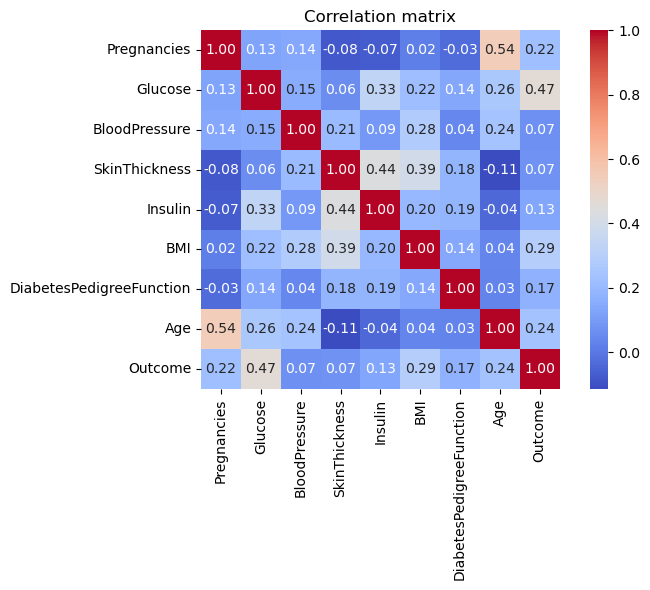

In [84]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()
plt.close()

## Grouped Statistics by Outcome

### Group by Outcome and Compute Means

In [136]:
df.groupby("Outcome").mean(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Mean Values by Outcome:**
- Glucose: 141 (diabetics) vs 109 (non-diabetics)
- BMI: 35.3 vs 30.9
- Age: 37.9 vs 31.2
- Pregnancies: 3.8 vs 3.2  
**Takeaway:** Glucose and BMI show the largest differences between diabetics and non-diabetics, highlighting key risk factors.


### Group by Age Group

In [138]:
numeric_cols = df.select_dtypes(include="number").columns

# group by age group
ag = df.groupby("AgeGroup", observed=True)[numeric_cols].agg(["count", "mean", "median"])

# flatten columns
ag.columns = ["_".join(col).strip() for col in ag.columns.values]
ag

,Pregnancies_count,Pregnancies_mean,Pregnancies_median,Glucose_count,Glucose_mean,Glucose_median,BloodPressure_count,BloodPressure_mean,BloodPressure_median,SkinThickness_count,...,BMI_median,DiabetesPedigreeFunction_count,DiabetesPedigreeFunction_mean,DiabetesPedigreeFunction_median,Age_count,Age_mean,Age_median,Outcome_count,Outcome_mean,Outcome_median
AgeGroup,,,,,,,,,,,,,,,,,,,,,
Young Adult,396,1.921717,2.0,396,113.744949,109.0,396,65.348485,68.0,396,...,31.2,396,0.451048,0.3655,396,24.313131,24.0,396,0.212121,0.0
Early Middle Age,239,5.564854,5.0,239,125.163180,122.0,239,69.945607,74.0,239,...,32.9,239,0.497615,0.3800,239,36.472803,37.0,239,0.493724,0.0
Late Middle Age,101,6.940594,7.0,101,133.326733,130.0,101,79.722772,78.0,101,...,32.8,101,0.501198,0.3780,101,50.584158,50.0,101,0.564356,1.0
Senior,31,4.903226,5.0,31,138.387097,136.0,31,75.870968,78.0,31,...,28.8,31,0.444355,0.4190,31,64.322581,64.0,31,0.290323,0.0
Elderly,1,9.000000,9.0,1,134.000000,134.0,1,74.000000,74.0,1,...,25.9,1,0.460000,0.4600,1,81.000000,81.0,1,0.000000,0.0


***Late Middle Age Group and Early Middle Age Grup have the strong tendency.***

## Multi-feature Insights (Interaction Analysis)

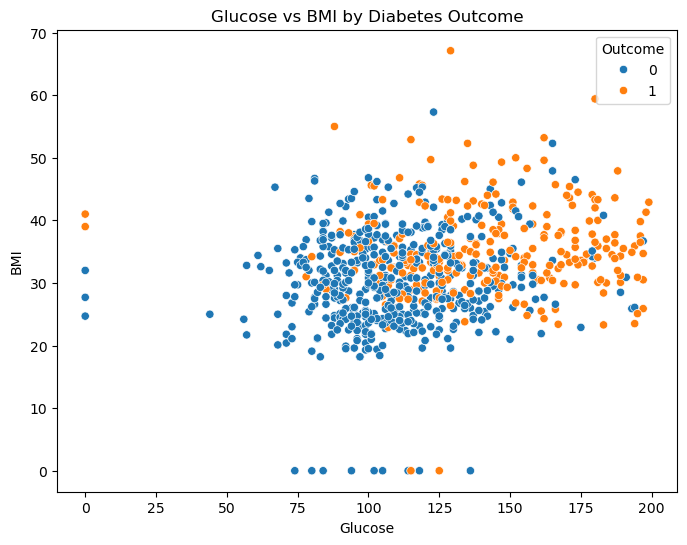

In [133]:
# Glucose vs BMI by Outcome
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.show()


**Insight:** Individuals with both high glucose and high BMI are most likely to have diabetes. Preventive measures could focus on patients with this profile.

## Pregnancies and Diabetes Risk

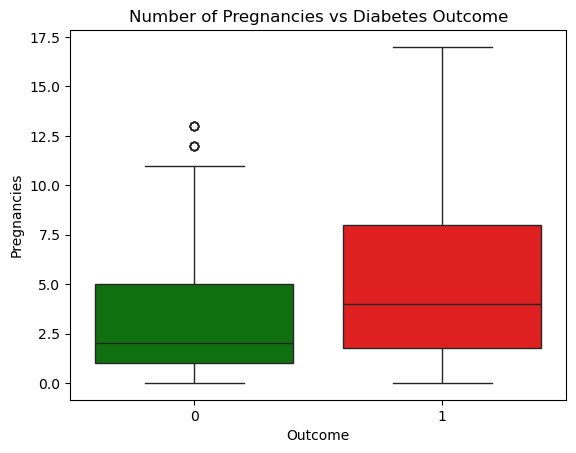

In [158]:
# define custom palette
palette = {0: 'green', 1: 'red'}  

sns.boxplot(x='Outcome', y='Pregnancies', data=df, hue= "Outcome", palette=palette, legend=False) 
plt.title('Number of Pregnancies vs Diabetes Outcome') 
plt.show()

**Insight:** Slightly higher average pregnancies in diabetic group, but effect is less pronounced than glucose or BMI.

**Summary of Findings:** 
1. Glucose is the strongest predictor of diabetes risk. 
2. BMI is also a significant factor; higher BMI increases likelihood. 
3. Age contributes moderately to risk. 
4. Combination of high glucose and high BMI identifies high-risk individuals. 
5. Pregnancies and insulin show smaller effects individually.
   
**Actionable Insight:** Healthcare interventions should focus on monitoring glucose and BMI, especially for older adults.
Targeted lifestyle advice could reduce diabetes risk.